In [8]:
!nvidia-smi
!pip install -q torch diffusers transformers accelerate safetensors pillow


Thu Feb 26 05:48:30 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             27W /   70W |    3969MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
import torch
from diffusers import StableDiffusionPipeline

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Model ID
model_id = "runwayml/stable-diffusion-v1-5"

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)

print("✅ Model loaded successfully!")

Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ Model loaded successfully!


In [10]:
from PIL import Image
from datetime import datetime
from IPython.display import display

def generate_image(prompt):
    print("\n🎨 Generating image... Please wait...")

    result = pipe(
        prompt=prompt,
        guidance_scale=7.5,
        num_inference_steps=30
    )

    image = result.images[0]

    filename = datetime.now().strftime("image_%Y%m%d_%H%M%S.png")
    image.save(filename)

    print("✅ Saved as:", filename)

    return image


==== Continuous AI Image Generator ====
Type 'exit' or 'quit' to stop


📝 Enter your prompt:
> A futuristic AI robot in a cyberpunk city

🎨 Generating image... Please wait...


  0%|          | 0/30 [00:00<?, ?it/s]

✅ Saved as: image_20260226_055737.png


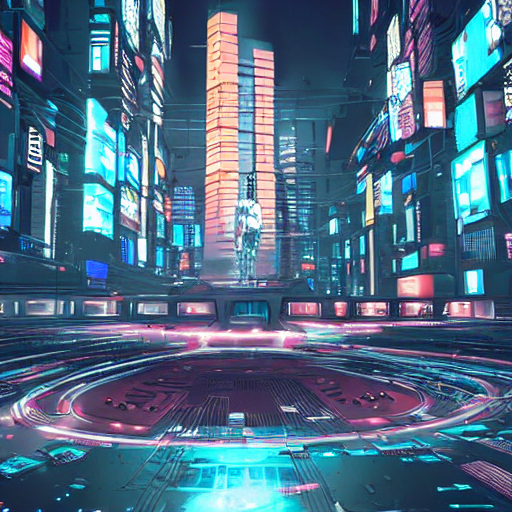


📝 Enter your prompt:
> A beautiful white horse on a rooftop

🎨 Generating image... Please wait...


  0%|          | 0/30 [00:00<?, ?it/s]

✅ Saved as: image_20260226_055759.png


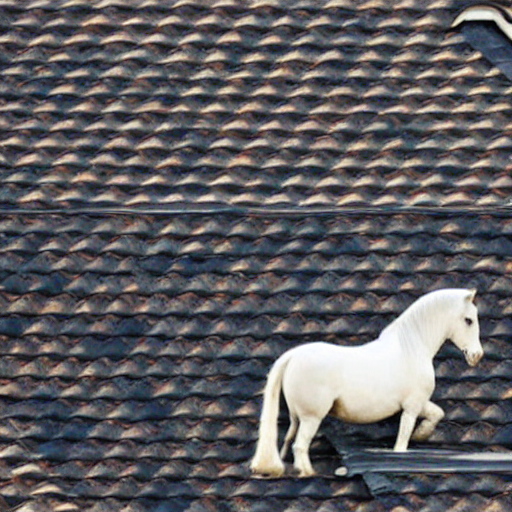

In [ ]:
print("\n==== Continuous AI Image Generator ====")
print("Type 'exit' or 'quit' to stop\n")

while True:

    prompt = input("\n📝 Enter your prompt:\n> ")

    if prompt.lower() in ["exit", "quit", "stop"]:
        print("\n👋 Stopping generator. Bye!")
        break

    if not prompt.strip():
        print("⚠️ Prompt cannot be empty!")
        continue

    img = generate_image(prompt)
    display(img)